In [216]:
import numpy as np
import pandas as pd
import scipy.sparse
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [240]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [222]:
import matplotlib.pyplot as plt

In [241]:
df =  pd.read_csv('/content/concertriccir2.csv')

In [242]:
df.rename(columns={'7.003345706103683010e-01': 'x1', '-2.470675778972781789e-01': 'x2','0.000000000000000000e+00':'y'}, inplace=True)

In [220]:
df

x1        x2    y
0   -3.950019  2.740080  1.0
1    0.150222 -2.157638  1.0
2   -1.672050 -0.941519  1.0
3    2.560483 -1.846577  1.0
4   -1.724979  3.463930  1.0
..        ...       ...  ...
494  2.177895  2.984489  1.0
495  1.778905  2.869205  1.0
496  0.894180  3.069959  0.0
497  0.849439  3.875435  0.0
498  5.217443  1.400818  0.0

[499 rows x 3 columns]

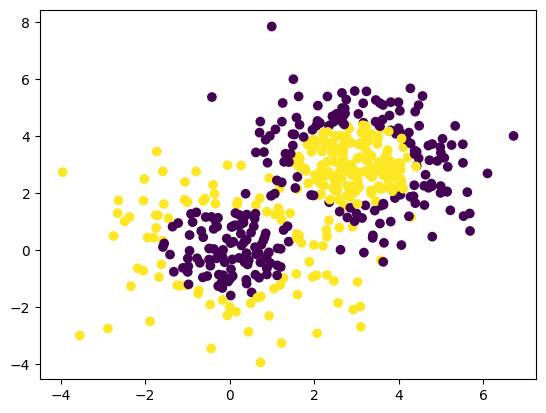

In [243]:
plt.scatter(x=df['x1'],y=df['x2'],c=df['y'])

In [265]:
model = Sequential()

In [266]:
model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [267]:
adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [268]:
history = model.fit(df.iloc[:,0:2],df.iloc[:,2],epochs=200,validation_split=0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4960 - loss: 0.6959 - val_accuracy: 0.5800 - val_loss: 0.6868
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5679 - loss: 0.6724 - val_accuracy: 0.5700 - val_loss: 0.6821
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5812 - loss: 0.6563 - val_accuracy: 0.7200 - val_loss: 0.6639
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6410 - loss: 0.6520 - val_accuracy: 0.7100 - val_loss: 0.6524
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7058 - loss: 0.6264 - val_accuracy: 0.7600 - val_loss: 0.6234
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6817 - loss: 0.6137 - val_accuracy: 0.7500 - val_loss: 0.6211
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7037 - loss: 0.6072 - val_accuracy: 0.7500 - val_loss: 0.6215
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7044 - loss: 0.6126 - val_accuracy: 0.7800 -

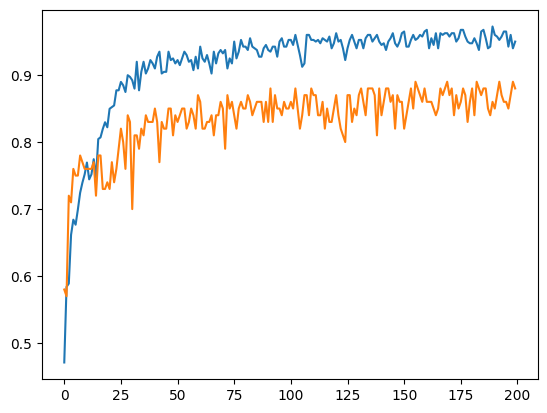

In [269]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])